# Importing necessary Modules

In [1]:
import re
import warnings
import pandas as pd
import seaborn as sns
import ipywidgets as ipw
from numpy import arange,array
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings("ignore")

# Reading Data

In [3]:
# filePath = "C:/Users/koush/Downloads/archive (1)/House_Rent_Dataset.csv"
data = pd.read_csv('House_Rent_Dataset.csv')
data

,BHK,Rent,Size,Floor,AreaType,AreaLocality,City,FurnishingStatus,TenantPreferred,Bathroom,PointofContact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [4]:
data.isnull().sum()

BHK                 0
Rent                0
Size                0
Floor               0
AreaType            0
AreaLocality        0
City                0
FurnishingStatus    0
TenantPreferred     0
Bathroom            0
PointofContact      0
dtype: int64

In [5]:
data=data.drop_duplicates()
data

,BHK,Rent,Size,Floor,AreaType,AreaLocality,City,FurnishingStatus,TenantPreferred,Bathroom,PointofContact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4738 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BHK               4738 non-null   int64 
 1   Rent              4738 non-null   int64 
 2   Size              4738 non-null   int64 
 3   Floor             4738 non-null   object
 4   AreaType          4738 non-null   object
 5   AreaLocality      4738 non-null   object
 6   City              4738 non-null   object
 7   FurnishingStatus  4738 non-null   object
 8   TenantPreferred   4738 non-null   object
 9   Bathroom          4738 non-null   int64 
 10  PointofContact    4738 non-null   object
dtypes: int64(4), object(7)
memory usage: 444.2+ KB


In [7]:
temp=data["Floor"]
temp.unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

# Necessary Functions

In [10]:
def boxPlot(x,y="Rent"):
    sns.boxplot(x=data[x],y=data[y])
    plt.show()

def removeOutliers(column,keys=None,quantile=0.75):
    if keys is None:
        keys = data[column].unique()
    for key in keys:
        temp = data[data[column]==key]["Rent"]
        limit = temp.quantile(quantile)
        t=temp>limit
        for idx in t.index:
            if t.loc[idx]:
                data.at[idx,"Rent"]=limit

def describe(column,nrows,ncols,keys=None,figsize=(20,8),names=None):
    if keys is None:
        keys = data[column].unique()
    if names is None:
        names = column
    fig,axes=plt.subplots(nrows,ncols)
    fig.set_size_inches(figsize)
    axes=axes.ravel()
    for i,key in enumerate(keys):
        temp=data[data[column]==key]["Rent"]
        temp.hist(ax=axes[i])
        axes[i].set_title(f"{names} : {key}")
        print(f"{names} : {key}\n")
        print(temp.describe())
        print("==============================================")
    plt.tight_layout()
    plt.show()

def floorparser(floor):
    temp={"Lower Basement":-2,"Upper Basement":-1,"Ground":0}
    x=re.findall("(.*) out of .*",floor)
    if x:
        x=x[0]
        if x.isnumeric():
            return int(x)
        return temp[x]
    if floor.isnumeric():
        return int(floor)
    return temp[floor]

def tenantparser(x,key):
    x=x.split("/")
    if len(x)==2:
        return 1
    return 1 if key==x[0] else 0

def encoder(column,labels):
    data[column]=data[column].apply(lambda x:labels[x])

# Analysis Of Data

In [11]:
columns = data.keys()
print("Features")
for i,column in enumerate(columns,1):
    print(f"{i}. {column}")

Features
1. BHK
2. Rent
3. Size
4. Floor
5. AreaType
6. AreaLocality
7. City
8. FurnishingStatus
9. TenantPreferred
10. Bathroom
11. PointofContact


In [12]:
corr=data.corr()
corr

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369081,0.715636,0.794219
Rent,0.369081,1.000000,0.413535,0.440704
Size,0.715636,0.413535,1.000000,0.740215
Bathroom,0.794219,0.440704,0.740215,1.000000


> No.of Bathroom is most correlated to Rent and then BHK and Size

#### Analysis of Bathroom on Rent

In [13]:
column = "Bathroom"

Bathroom : 2

count      2291.000000
mean      25043.538193
std       26984.040463
min        3200.000000
25%       12000.000000
50%       16500.000000
75%       28750.000000
max      600000.000000
Name: Rent, dtype: float64
Bathroom : 1

count      1470.000000
mean      11863.351701
std        9624.122232
min        1500.000000
25%        6500.000000
50%        9000.000000
75%       13500.000000
max      100000.000000
Name: Rent, dtype: float64
Bathroom : 3

count    7.470000e+02
mean     6.301117e+04
std      1.363190e+05
min      1.200000e+03
25%      2.500000e+04
50%      4.000000e+04
75%      7.000000e+04
max      3.500000e+06
Name: Rent, dtype: float64
Bathroom : 5

count        60.000000
mean     252350.000000
std      158942.887621
min       27000.000000
25%      130000.000000
50%      240000.000000
75%      350000.000000
max      680000.000000
Name: Rent, dtype: float64
Bathroom : 4

count    1.540000e+02
mean     1.687792e+05
std      1.642692e+05
min      1.500000e+04
25%   

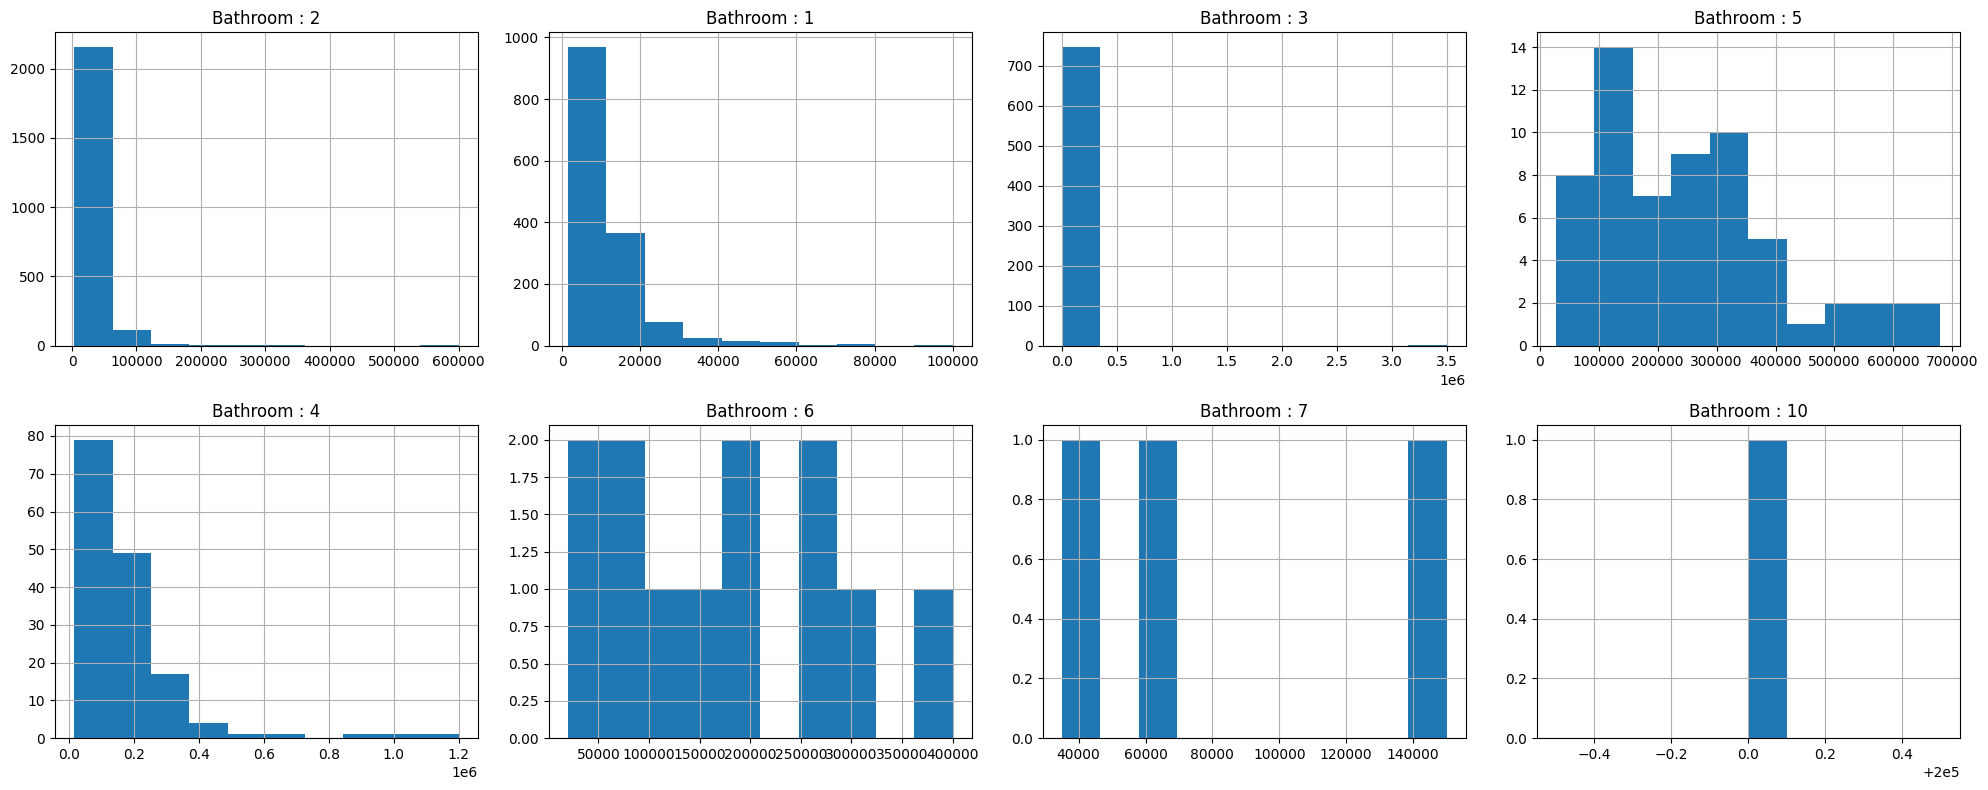

In [14]:
describe(column,2,4)

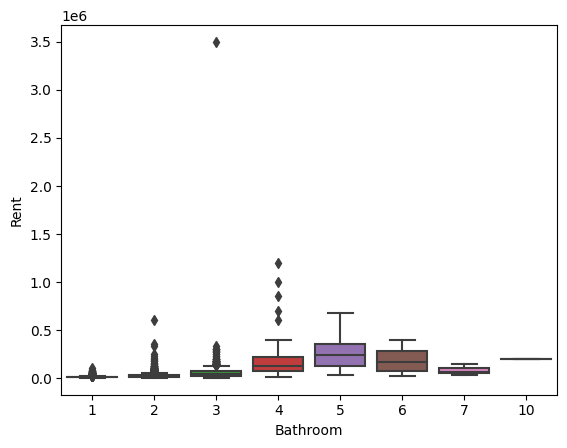

In [15]:
boxPlot(column)

In [16]:
removeOutliers(column=column,quantile=0.90)

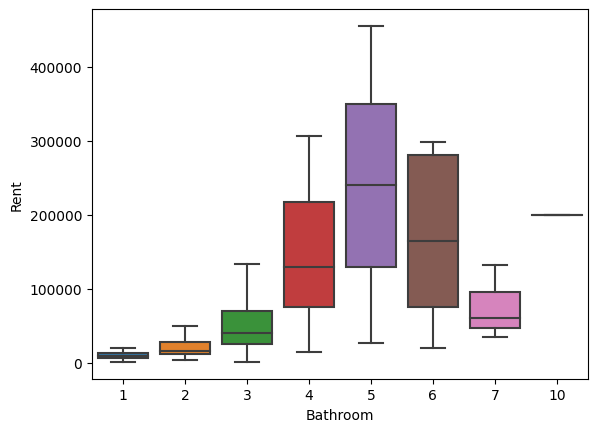

In [17]:
boxPlot(column)

#### Analysis of BHK on Rent

In [18]:
column = "BHK"

BHK : 2

count      2264.000000
mean      19443.464664
std       14377.988012
min        2000.000000
25%       10000.000000
50%       15000.000000
75%       22000.000000
max      150000.000000
Name: Rent, dtype: float64
BHK : 1

count      1164.000000
mean      12518.320447
std       10116.516734
min        1500.000000
25%        6500.000000
50%        9000.000000
75%       17000.000000
max      200000.000000
Name: Rent, dtype: float64
BHK : 3

count      1096.000000
mean      48288.116788
std       44246.268833
min        1200.000000
25%       20000.000000
50%       32000.000000
75%       60000.000000
max      307000.000000
Name: Rent, dtype: float64
BHK : 6

count         8.000000
mean      73125.000000
std       86310.796378
min       20000.000000
25%       27500.000000
50%       47500.000000
75%       65000.000000
max      280000.000000
Name: Rent, dtype: float64
BHK : 4

count       187.000000
mean     147376.475936
std      105331.067840
min       10000.000000
25%       60000.000

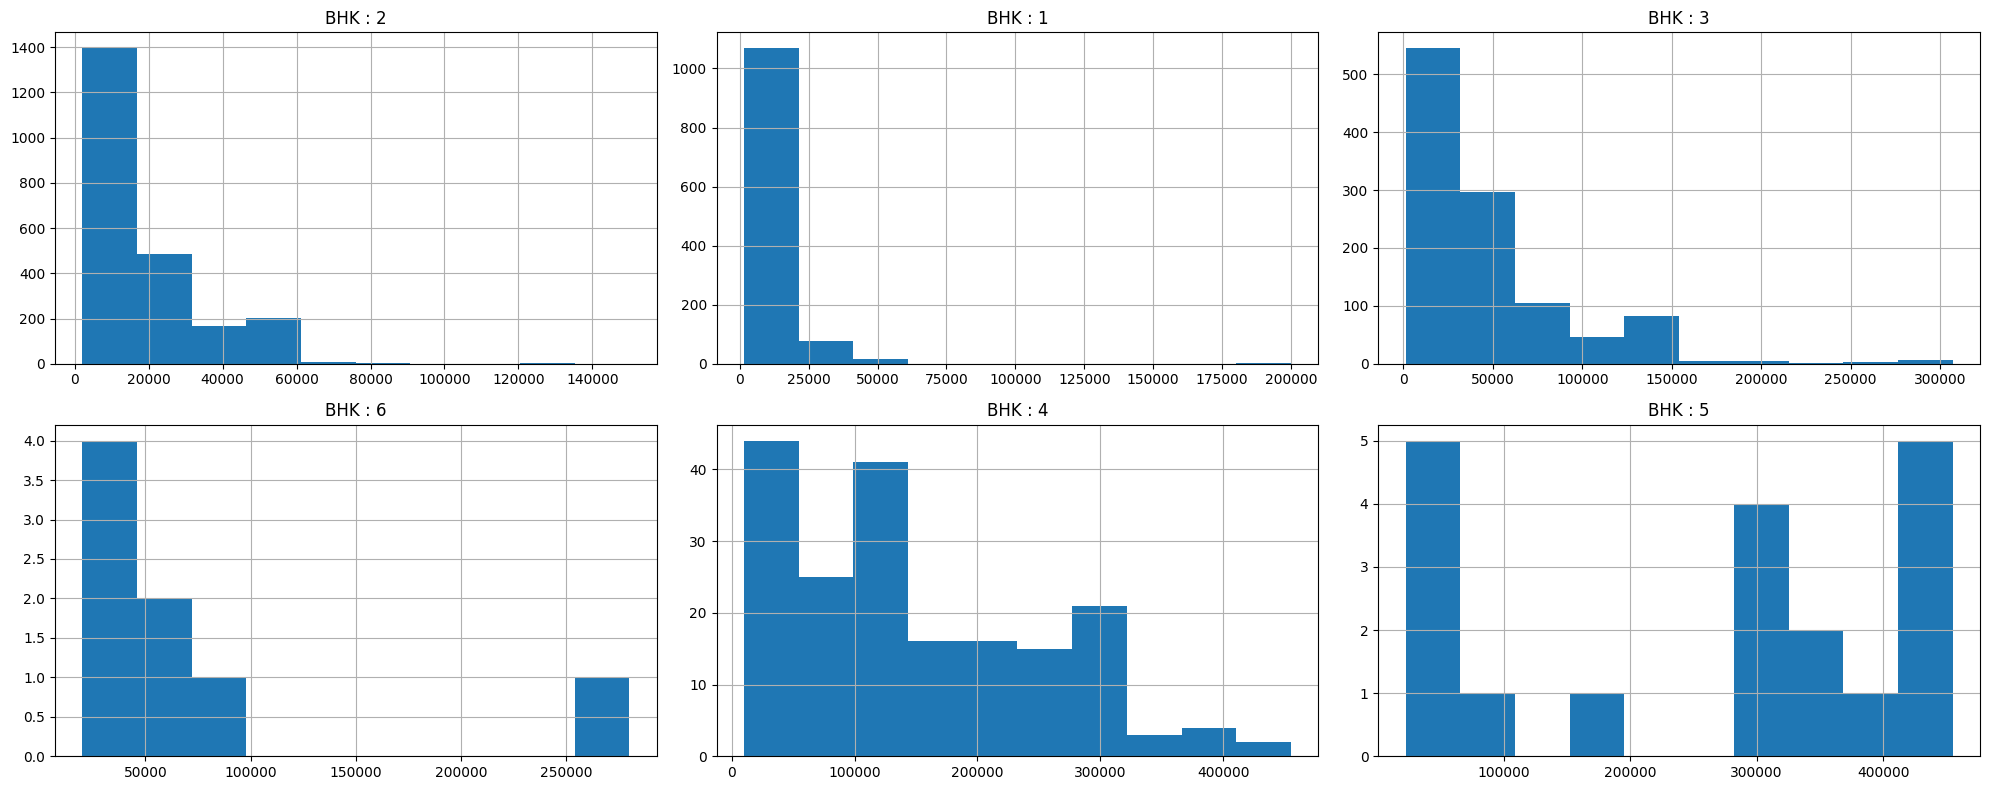

In [19]:
describe(column,2,3)

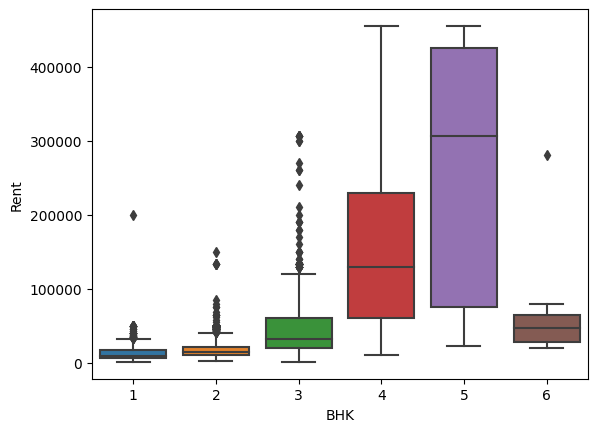

In [20]:
boxPlot(column)

In [21]:
removeOutliers(column,quantile=0.9)

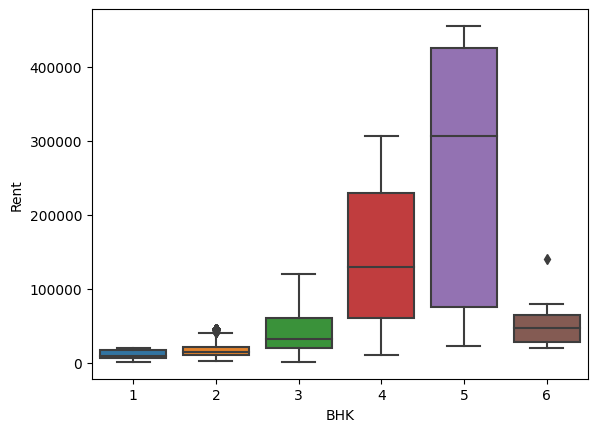

In [22]:
boxPlot(column)

#### Analysis of AreaLocality on Rent

In [23]:
del data["AreaLocality"]

#### Analysis of City on Rent

In [24]:
column = "City"

City : Kolkata

count      523.000000
mean     11304.437859
std       8263.995390
min       1500.000000
25%       6250.000000
50%       8500.000000
75%      14000.000000
max      65000.000000
Name: Rent, dtype: float64
City : Mumbai

count       969.000000
mean      62712.241486
std       68474.804457
min        4500.000000
25%       20550.000000
50%       45000.000000
75%       68000.000000
max      455000.000000
Name: Rent, dtype: float64
City : Bangalore

count       886.000000
mean      20518.961625
std       24616.249483
min        3500.000000
25%        9500.000000
50%       14000.000000
75%       20550.000000
max      307000.000000
Name: Rent, dtype: float64
City : Delhi

count       601.000000
mean      27890.349418
std       35838.165941
min        2000.000000
25%       11000.000000
50%       17000.000000
75%       30000.000000
max      307000.000000
Name: Rent, dtype: float64
City : Chennai

count       891.000000
mean      20220.379349
std       22144.625390
min        3000.

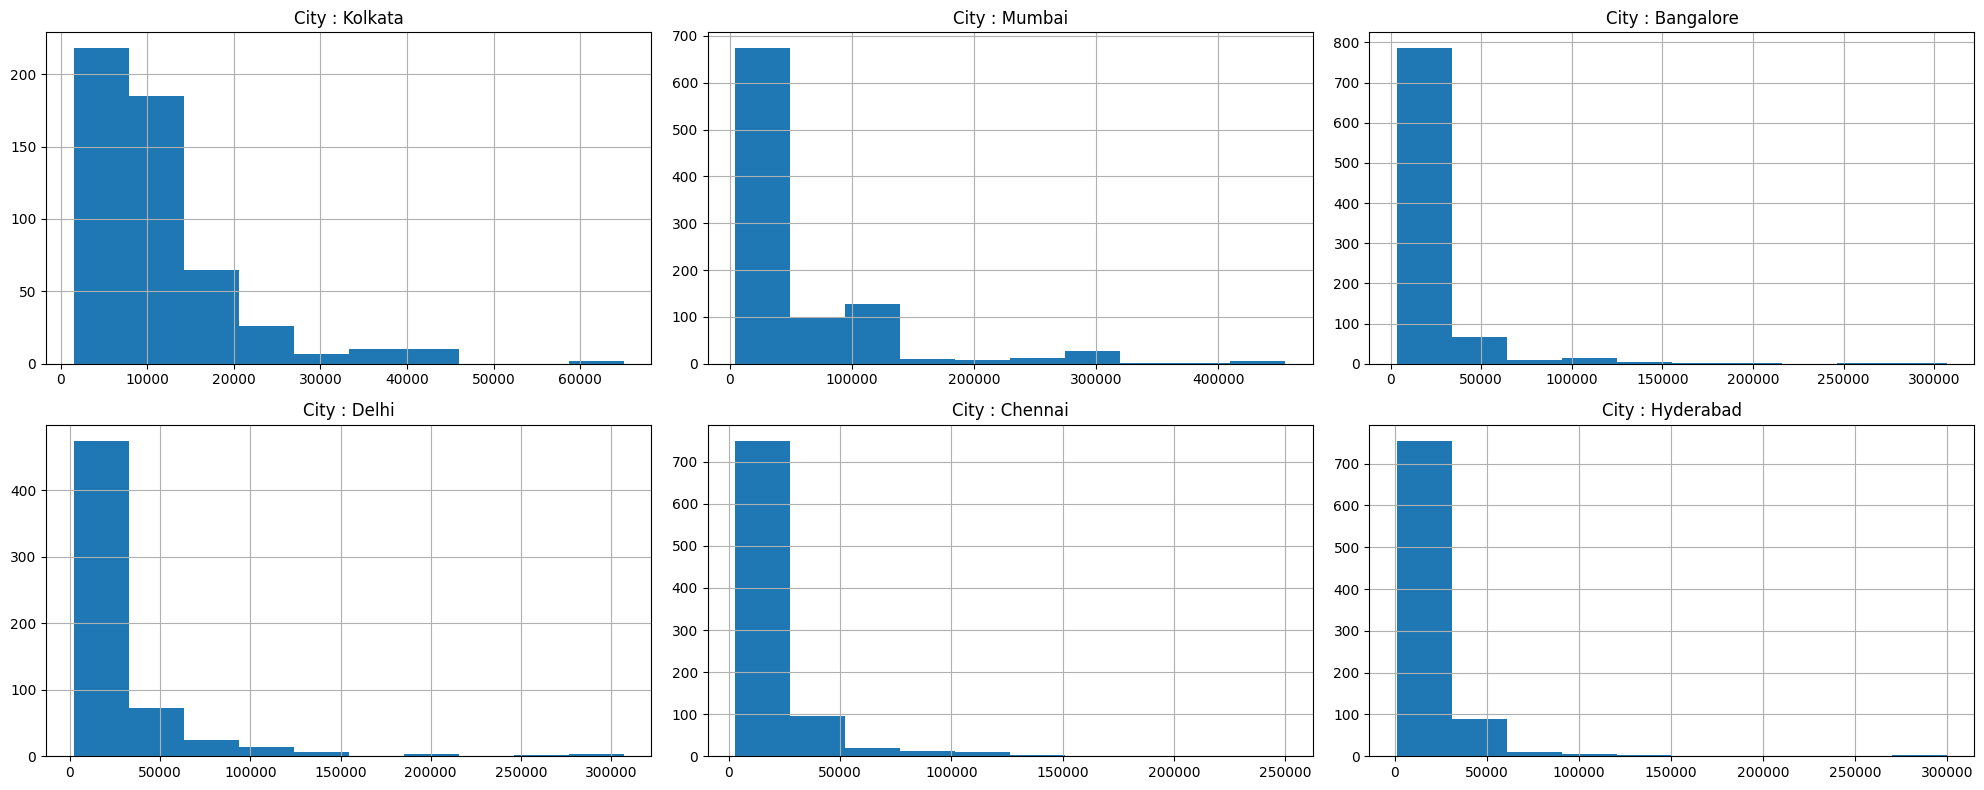

In [25]:
describe(column,2,3)

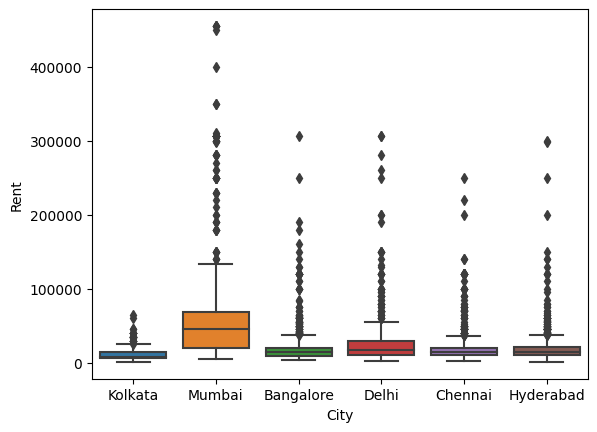

In [26]:
boxPlot(column)

In [27]:
removeOutliers(column,quantile=0.90)

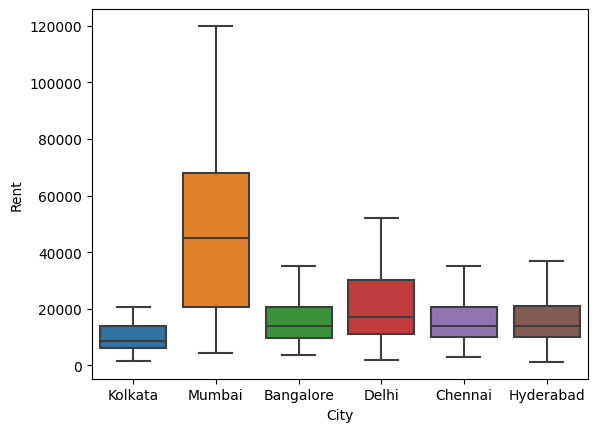

In [28]:
boxPlot(column)

In [29]:
cities={"Mumbai":6,"Bangalore":5,"Chennai":4,"Hyderabad":3,"Delhi":2,"Kolkata":1}
encoder(column,cities)

#### Analysis of AreaType on Rent

In [30]:
column = "AreaType"

AreaType : Super Area

count      2445.000000
mean      15725.515746
std       11037.928409
min        1500.000000
25%        8500.000000
50%       13000.000000
75%       20000.000000
max      120000.000000
Name: Rent, dtype: float64
AreaType : Carpet Area

count      2291.000000
mean      32533.869489
std       29824.749576
min        1200.000000
25%       13000.000000
50%       20550.000000
75%       43000.000000
max      120000.000000
Name: Rent, dtype: float64
AreaType : Built Area

count        2.000000
mean     10500.000000
std       6363.961031
min       6000.000000
25%       8250.000000
50%      10500.000000
75%      12750.000000
max      15000.000000
Name: Rent, dtype: float64


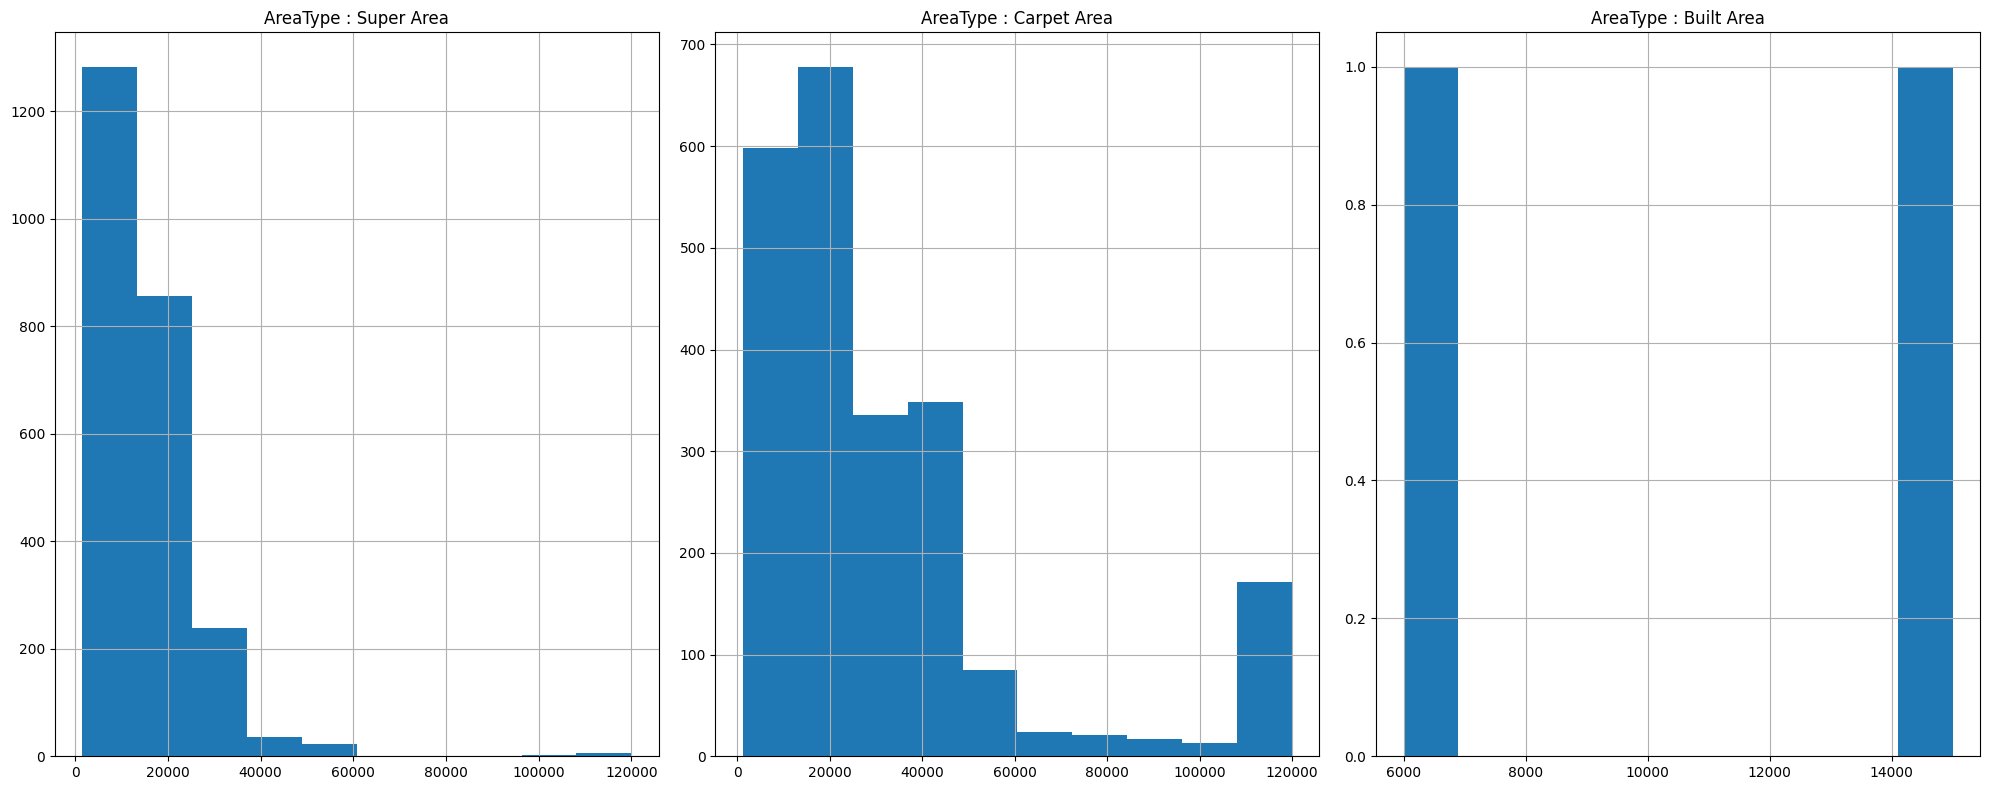

In [31]:
describe(column,1,3)

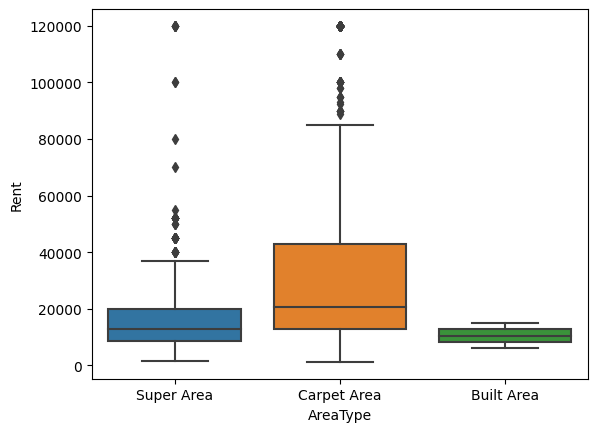

In [32]:
boxPlot(column)

In [33]:
# removeOutliers(column,quantile=0.90)

In [34]:
# boxPlot(column)

In [35]:
areaTypes={"Carpet Area":2,"Super Area":1,"Built Area":0}
encoder(column,areaTypes)

#### Analysis of FurnishingStatus on Rent

In [36]:
column = "FurnishingStatus"

FurnishingStatus : Unfurnished

count      1813.000000
mean      18142.072808
std       18174.696562
min        2000.000000
25%        8000.000000
50%       12000.000000
75%       20550.000000
max      120000.000000
Name: Rent, dtype: float64
FurnishingStatus : Semi-Furnished

count      2247.000000
mean      25376.987984
std       24033.254258
min        1500.000000
25%       12000.000000
50%       18000.000000
75%       31000.000000
max      120000.000000
Name: Rent, dtype: float64
FurnishingStatus : Furnished

count       678.000000
mean      34057.980826
std       30711.069580
min        1200.000000
25%       15000.000000
50%       20550.000000
75%       45000.000000
max      120000.000000
Name: Rent, dtype: float64


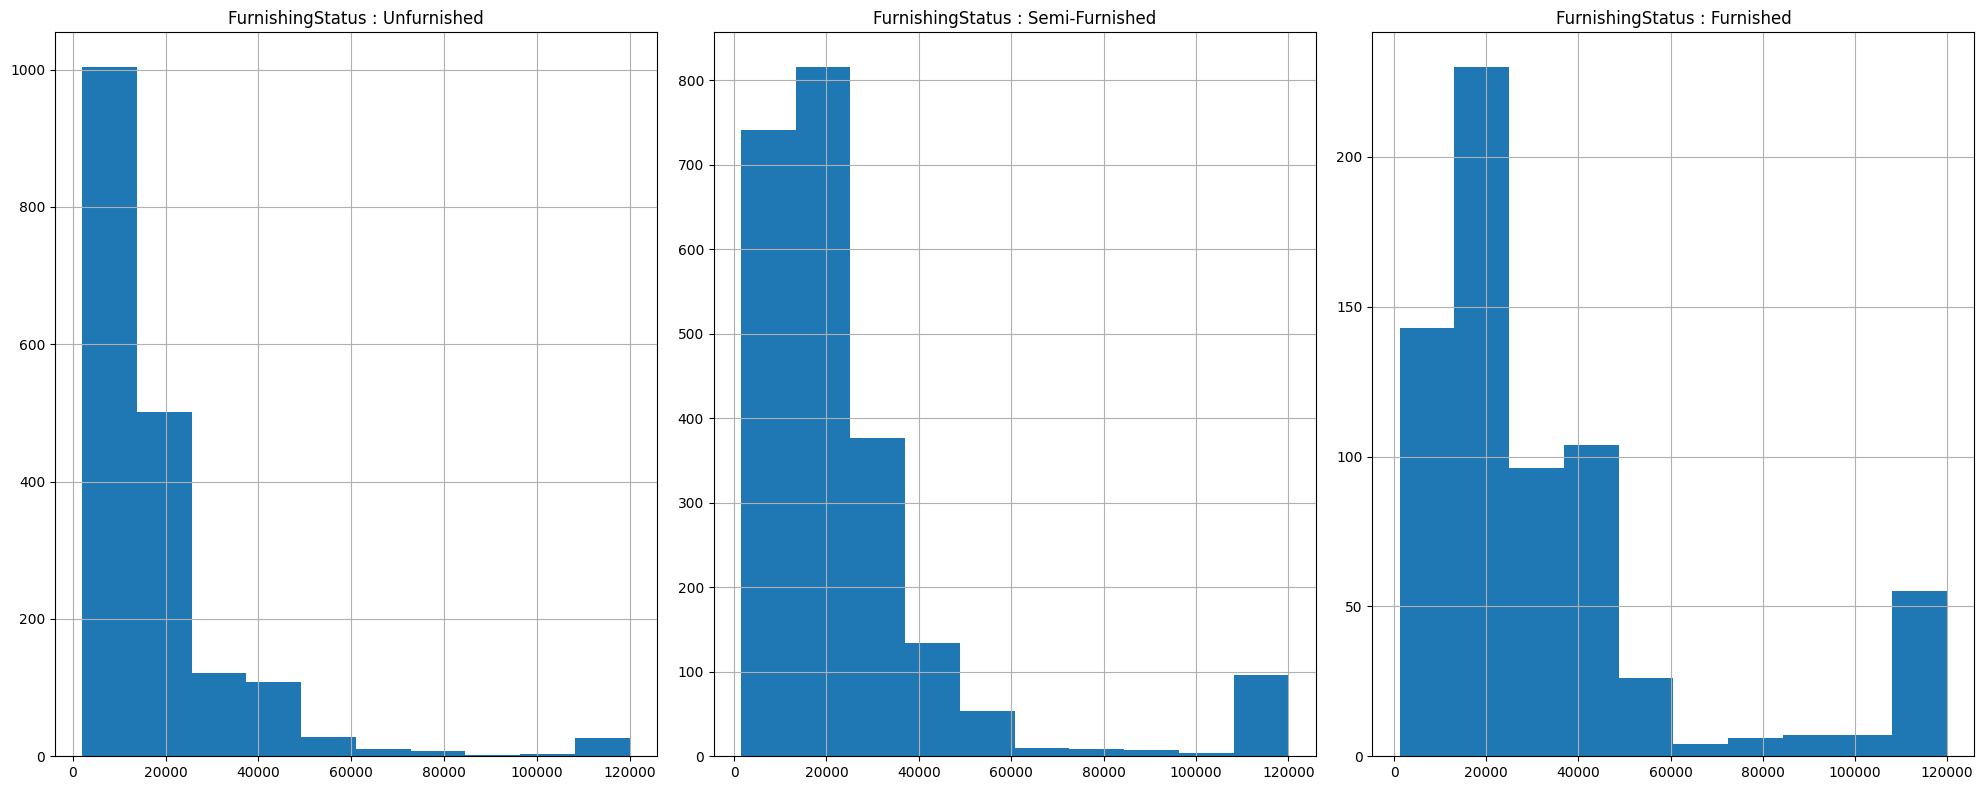

In [37]:
describe(column,1,3)

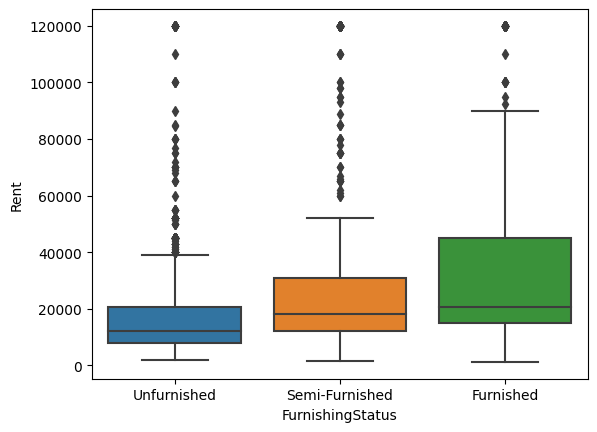

In [38]:
boxPlot(column)

In [39]:
removeOutliers(column,quantile=0.9)

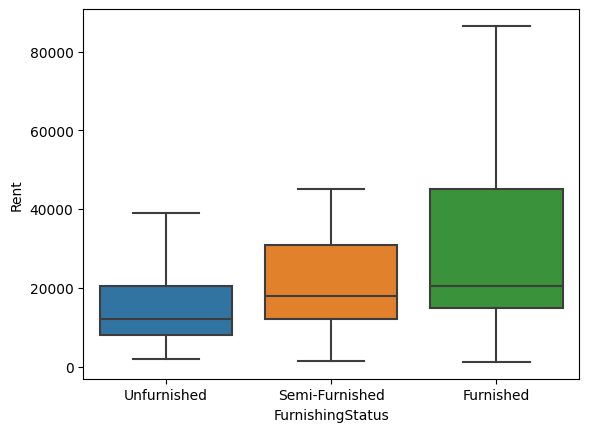

In [40]:
boxPlot(column)

In [41]:
status={"Semi-Furnished":2,"Furnished":1,"Unfurnished":0}
encoder(column,status)

#### Analysis of Floor on Rent

In [42]:
data["Floor"]=data["Floor"].apply(floorparser)

#### Analysis of PointOfContact on Rent

In [43]:
column="PointofContact"

PointofContact : Contact Owner

count     3215.000000
mean     14712.717263
std       8633.776424
min       1200.000000
25%       8500.000000
50%      12500.000000
75%      18000.000000
max      86500.000000
Name: Rent, dtype: float64
PointofContact : Contact Agent

count     1522.000000
mean     33658.078844
std      16780.045362
min       5000.000000
25%      20550.000000
50%      35000.000000
75%      45000.000000
max      86500.000000
Name: Rent, dtype: float64
PointofContact : Contact Builder

count       1.0
mean     5500.0
std         NaN
min      5500.0
25%      5500.0
50%      5500.0
75%      5500.0
max      5500.0
Name: Rent, dtype: float64


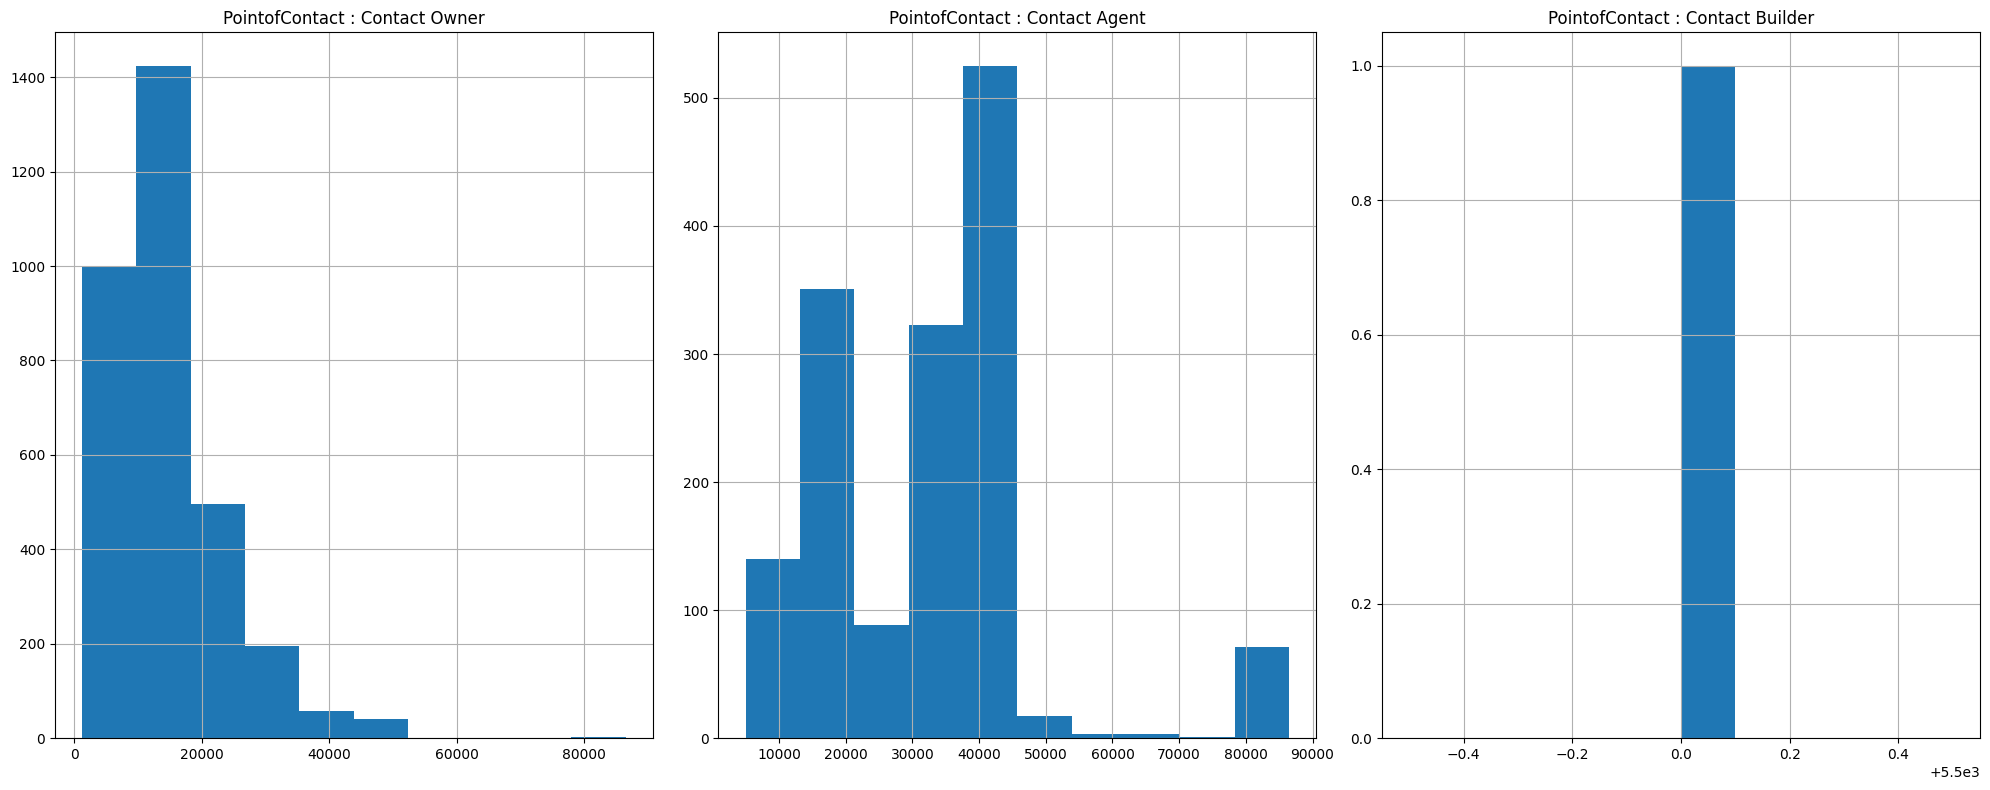

In [44]:
describe(column,1,3)

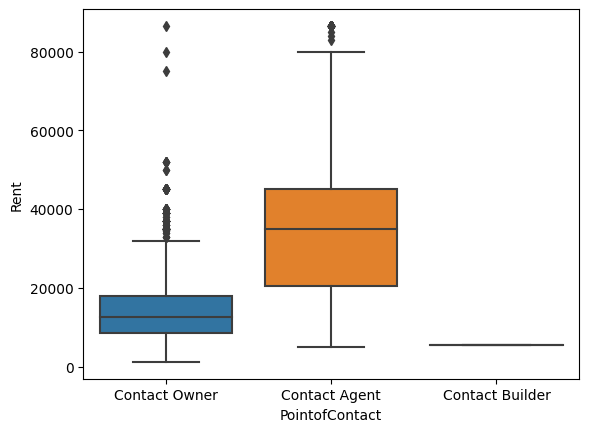

In [45]:
boxPlot(column)

In [46]:
# removeOutliers(column,quantile=1)

In [47]:
# boxPlot(column)

In [48]:
contact={"Contact Agent":2,"Contact Owner":1,"Contact Builder":0}
encoder(column,contact)

#### Analysis of TenantPreferred on Rent

In [49]:
data["forBachelors"]=data["TenantPreferred"].apply(lambda x:tenantparser(x,"Bachelors"))
data["forFamily"]=data["TenantPreferred"].apply(lambda x:tenantparser(x,"Family"))

del data["TenantPreferred"]

 for Bachelors

count     4267.000000
mean     20083.484884
std      14381.460956
min       1200.000000
25%      10000.000000
50%      15000.000000
75%      26000.000000
max      86500.000000
Name: Rent, dtype: float64
 for Family

count     3911.000000
mean     20310.274354
std      14821.028238
min       1200.000000
25%      10000.000000
50%      15000.000000
75%      26000.000000
max      86500.000000
Name: Rent, dtype: float64
 for Both

count     3440.000000
mean     19359.078779
std      14250.133551
min       1200.000000
25%       9500.000000
50%      15000.000000
75%      24000.000000
max      86500.000000
Name: Rent, dtype: float64


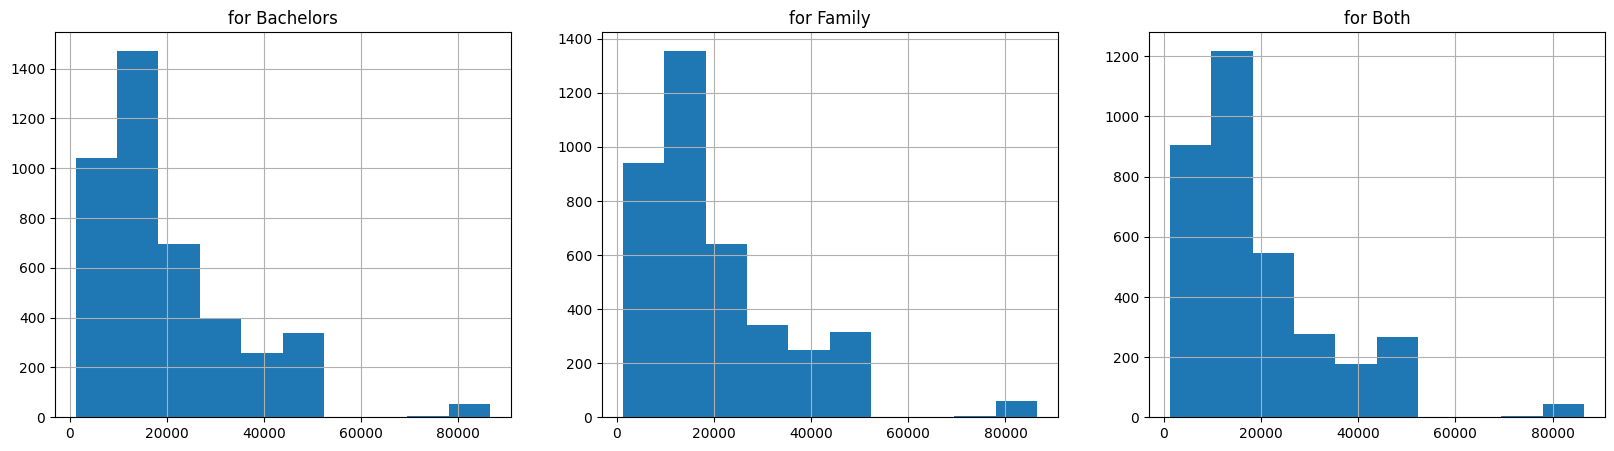

In [50]:
fig,axes=plt.subplots(1,3)
fig.set_size_inches((20,5))
axes=axes.ravel()

temp=data[data["forBachelors"]==1]["Rent"]
temp.hist(ax=axes[0])
axes[0].set_title("for Bachelors")
print(" for Bachelors\n")
print(temp.describe())
print("===========================")

temp=data[data["forFamily"]==1]["Rent"]
temp.hist(ax=axes[1])
axes[1].set_title("for Family")
print(" for Family\n")
print(temp.describe())
print("===========================")

temp= data[data["forBachelors"]==1]
temp=temp[temp["forFamily"]==1]["Rent"]
temp.hist(ax=axes[2])
axes[2].set_title("for Both")
print(" for Both\n")
print(temp.describe())
print("===========================")

plt.show()

In [51]:
tenant={"Bachelors":(1,0),"Family":(0,1),"Any":(1,1)}

> no much difference among three classes

can be removed

In [52]:
data

,BHK,Rent,Size,Floor,AreaType,City,FurnishingStatus,Bathroom,PointofContact,forBachelors,forFamily
0,2,10000.0,1100,0,1,1,0,2,1,1,1
1,2,20000.0,800,1,1,1,2,1,1,1,1
2,2,17000.0,1000,1,1,1,2,1,1,1,1
3,2,10000.0,800,1,1,1,0,1,1,1,1
4,2,7500.0,850,1,2,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000.0,1000,3,2,3,2,2,1,1,1
4742,3,29000.0,2000,1,1,3,2,3,1,1,1
4743,3,35000.0,1750,3,2,3,2,3,2,1,1
4744,3,37000.0,1500,23,2,3,2,2,2,0,1


In [53]:
data.corr()["Rent"]

BHK                 0.562960
Rent                1.000000
Size                0.465966
Floor               0.459591
AreaType            0.375837
City                0.425767
FurnishingStatus    0.162874
Bathroom            0.627552
PointofContact      0.597524
forBachelors       -0.144963
forFamily          -0.071429
Name: Rent, dtype: float64

In [54]:
data["Rent"].describe()

count     4738.000000
mean     20796.640355
std      14808.927260
min       1200.000000
25%      10000.000000
50%      16000.000000
75%      30000.000000
max      86500.000000
Name: Rent, dtype: float64

# Build a Model

In [55]:
features = data.drop(columns=["Rent"])
target   = data["Rent"]

In [56]:
X_train,X_test,y_train,y_test = train_test_split(features,target,train_size=0.75)

In [57]:
model = RandomForestRegressor(n_estimators=200)

In [58]:
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

#### Test the Model

In [59]:
y_preds = model.predict(X_test)

In [60]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_preds)
print("R-squared score:", r2)

R-squared score: 0.8740399720344898


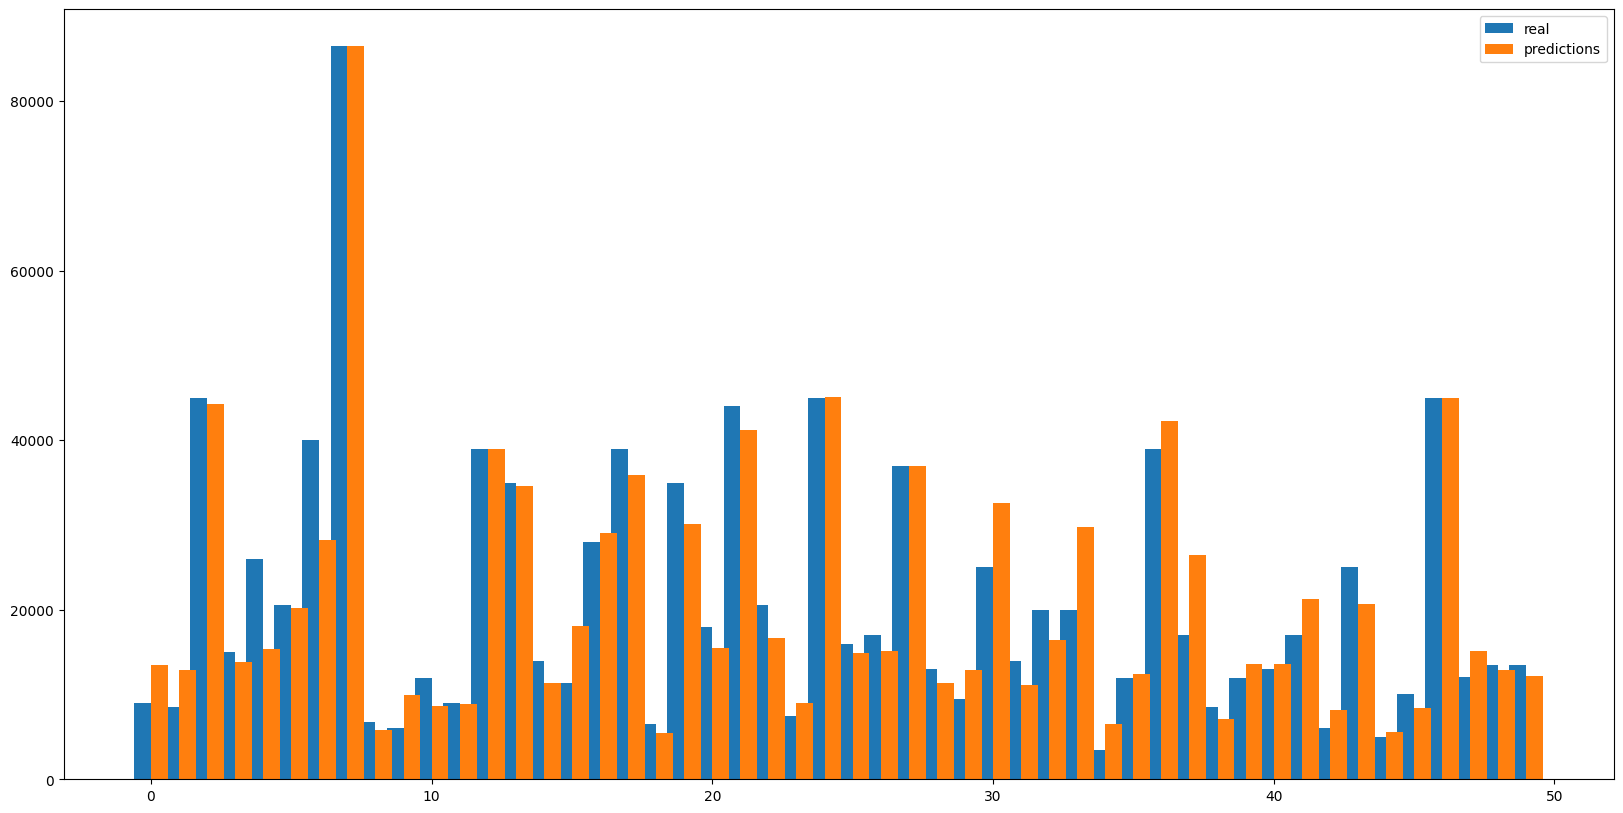

In [ ]:
X=arange(50)
plt.figure(figsize=(20,10))
plt.bar(X-0.3,y_test[50:100],0.6,label='real')
plt.bar(X+0.3,y_preds[50:100],0.6,label='predictions')
plt.legend()
plt.show()

In [ ]:
RMSE = (y_test-y_preds)**2
RMSE = RMSE.sum()/len(y_test)
RMSE = RMSE**0.5
RMSE

5464.332984571294

In [ ]:
relError = (y_test-y_preds)/y_test
relError = (relError**2).sum()
relError = relError/len(y_test)
relError = relError**0.5
relError

0.4134200200429786

#### Save the Model

In [ ]:
import pickle

In [ ]:
with open("rentPredicter","wb") as file:
    pickle.dump(model,file)

#### load Model

In [ ]:
with open("rentPredicter","rb") as file:
    predicter = pickle.load(file)

#### UI

In [ ]:
@ipw.interact(size=ipw.IntText(value=1000),BHK=ipw.IntText(value=2,maximum=10),Bathroom=ipw.IntText(value=2),floor=ipw.IntText(value=1))
def predict(BHK,size,floor,Bathroom,AreaType=areaTypes.keys(),city=cities.keys(),furnishingStatus=status.keys(),TenantPreferred=tenant.keys(),PointofContact=contact.keys()):
    tenant={"Bachelors":(1,0),"Family":(0,1),"Any":(1,1)}
    b,f=tenant[TenantPreferred]
    X=array([BHK,size,floor,areaTypes[AreaType],cities[city],status[furnishingStatus],Bathroom,contact[PointofContact],b,f])
    X=X.reshape(1,-1)
    s=u'\u20B9'
    y=predicter.predict(X)[0]
    print(f"Rent will be around {s}{int(y)}")
    print(f"range of rent:{s}{int((1-relError/2)*y)} - {s}{int((1+relError/2)*y)}")
    

interactive(children=(IntText(value=2, description='BHK'), IntText(value=1000, description='size'), IntText(va…